In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Пример: визуализация количества велосипедов в Сиэтле 

Более сложный пример работы с данными временных рядов. Рассмотрим подсчет количества велосипедов на Фримонтском мосту в Сиэтле.

In [4]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [10]:
# сократим названия столбцов для удобства
data.columns = ['Total', 'East', 'West']
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [12]:
# сводные статистические показатели
data.dropna().describe()

,Total,East,West
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977
std,133.270779,60.779588,82.619206
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,58.000000,26.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


Text(0.5, 0, 'Дата')

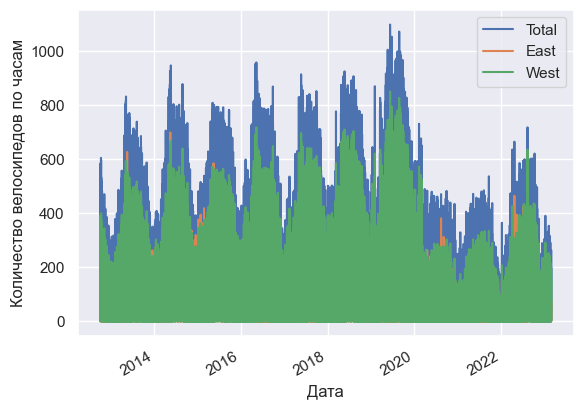

In [15]:
data.plot()
plt.ylabel("Количество велосипедов по часам")
plt.xlabel("Дата")

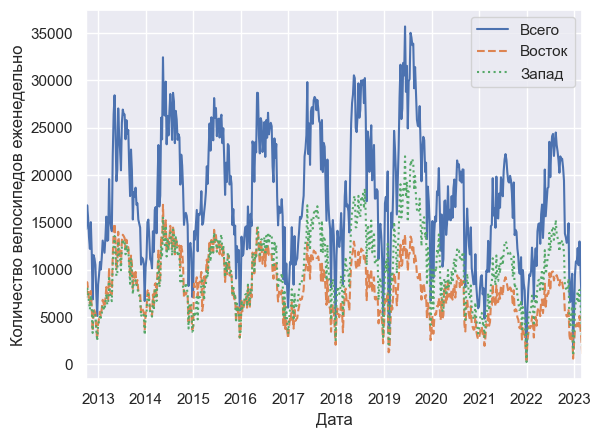

In [20]:
# Выполним передискретизацию с шагом одна неделя 
weekly = data.resample("W").sum()
weekly.plot(style=['-', '--', ':'])
plt.ylabel("Количество велосипедов еженедельно")
plt.xlabel("Дата")
plt.legend(['Всего', 'Восток', 'Запад'])

<AxesSubplot:xlabel='Date'>

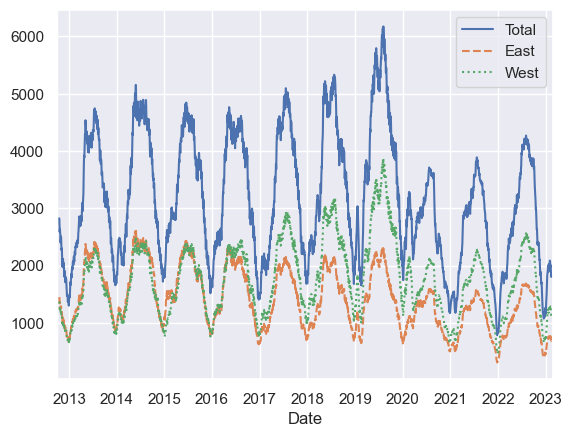

In [26]:
# вычислим скользящую среднюю за 30 дней
daily = data.resample('D').mean()
daily.rolling(30, center=True).sum().plot(style=['-', '--', ':'])

Более гладкую версию скользящего среднего можно получить, воспользовавшись оконной функцией, например Гауссовым окном

Text(0.5, 1.0, 'Сглаженная Гауссова функция еженедельного количества велосипедов')

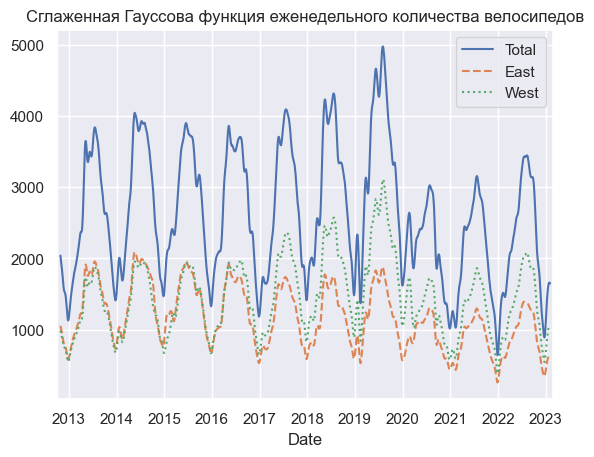

In [28]:
# ширина окна = 50 дней, ширина Гауссовой функции внутри окна = 10 дней
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-', '--', ':'])
plt.title("Сглаженная Гауссова функция еженедельного количества велосипедов")

Text(0.5, 1.0, 'Среднее почасовое количество велосипедов')

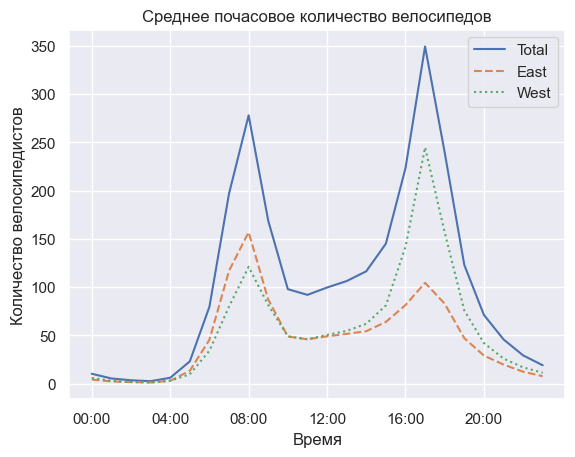

In [31]:
# усредненное движение велосипедов как функцию от времени суток
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', '--', ':'])
plt.xlabel("Время")
plt.ylabel("Количество велосипедистов")
plt.title("Среднее почасовое количество велосипедов")

Text(0.5, 1.0, 'Среднее количество велосипедов по дням')

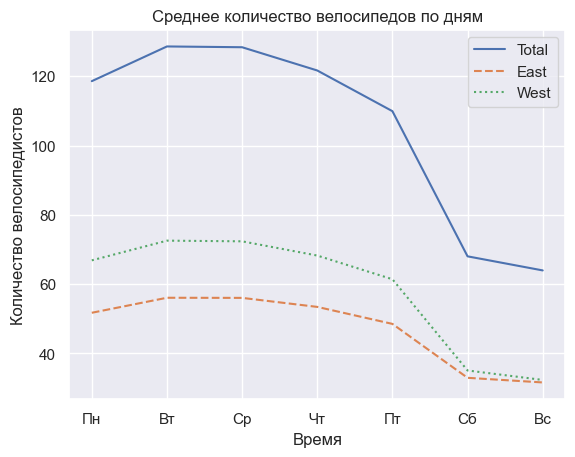

In [36]:
# изменения ситуации по дням недели
by_weekdays = data.groupby(data.index.dayofweek).mean()
by_weekdays.index = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
by_weekdays.plot(style=['-', '--', ':'])
plt.xlabel("Время")
plt.ylabel("Количество велосипедистов")
plt.title("Среднее количество велосипедов по дням")

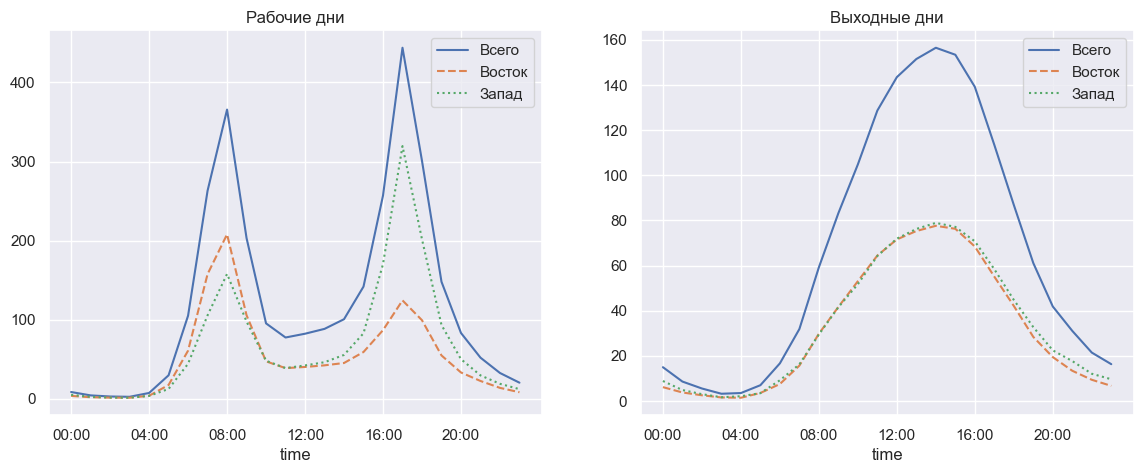

In [122]:
# группировка по признаку выходного дня и по времени суток
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Рабочие дни', xticks=hourly_ticks, style=['-', '--', ':'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Выходные дни', xticks=hourly_ticks, style=['-', '--', ':'])
ax[0].legend(['Всего', 'Восток', 'Запад'])
ax[1].legend(['Всего', 'Восток', 'Запад'])

Мы видим бимодальный паттерн, связанный с поездками на работу в город на протяжении рабочей недели, и унимодальный паттерн, связанный с досугом/отдыхом во время выходных